```Python
from google.colab import drive

drive.mount('/content/drive')
```

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly as py
import plotly.express as px
import plotly.graph_objects as go
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
cc_data = pd.read_csv("risk_factors_cervical_cancer.csv")

In [4]:
pd.set_option('display.max_columns', None)
cc_data

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


In [5]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [6]:
pd.Series({c: cc_data[c].unique() for c in cc_data})

Age                                   [18, 15, 34, 52, 46, 42, 51, 26, 45, 44, 27, 4...
Number of sexual partners             [4.0, 1.0, 5.0, 3.0, 2.0, 6.0, ?, 7.0, 15.0, 8...
First sexual intercourse              [15.0, 14.0, ?, 16.0, 21.0, 23.0, 17.0, 26.0, ...
Num of pregnancies                    [1.0, 4.0, 2.0, 6.0, 3.0, 5.0, ?, 8.0, 7.0, 0....
Smokes                                                                    [0.0, 1.0, ?]
Smokes (years)                        [0.0, 37.0, 34.0, 1.266972909, 3.0, 12.0, ?, 1...
Smokes (packs/year)                   [0.0, 37.0, 3.4, 2.8, 0.04, 0.5132021277, 2.4,...
Hormonal Contraceptives                                                   [0.0, 1.0, ?]
Hormonal Contraceptives (years)       [0.0, 3.0, 15.0, 2.0, 8.0, 10.0, 5.0, 0.25, 7....
IUD                                                                       [0.0, 1.0, ?]
IUD (years)                           [0.0, 7.0, ?, 5.0, 8.0, 6.0, 1.0, 0.58, 2.0, 1...
STDs                            

In [7]:
val_lst = []
for i in cc_data.columns:
  val = cc_data[i][cc_data[i] == '?'].count()
  val_lst.append(val)
  ## val = 0

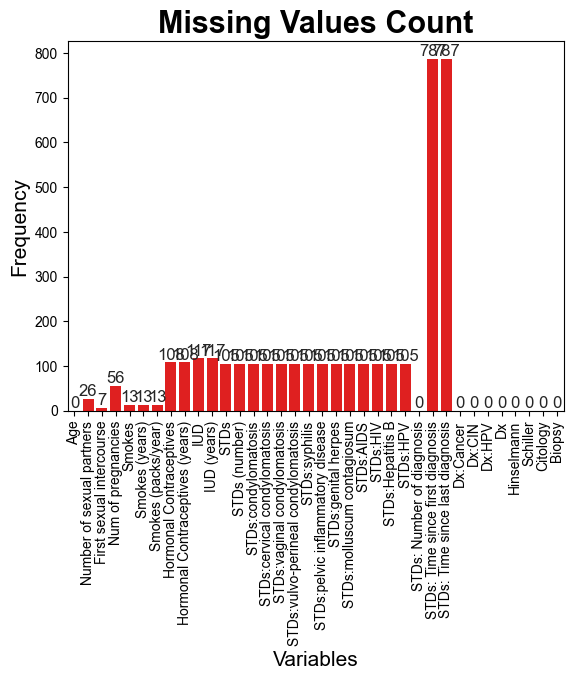

In [8]:
fig = sns.barplot(x = cc_data.columns, y = val_lst, color = "red")
sns.set(rc={"figure.figsize":(18, 5)})
fig.set_title('Missing Values Count', fontdict={'size': 22, 'weight': 'bold'})
fig.set_xlabel('Variables', fontdict={'size': 15})
fig.set_ylabel('Frequency', fontdict={'size': 15})

for item in fig.get_xticklabels():
    item.set_rotation(90)

fig.bar_label(fig.containers[0]);

In [9]:
f = pd.get_dummies(
    cc_data, prefix='', prefix_sep='', dummy_na=True
 ).groupby(level=0, axis=1).sum()  # Sum the *counts* for each column.
f

,0.0,0.001,0.003,0.025,0.04,0.05,0.08,0.1,0.15,0.16,0.17,0.2,0.25,0.3,0.32,0.33,0.37,0.4,0.41,0.42,0.45,0.5,0.5132021277,0.58,0.66,0.67,0.7,0.75,0.8,0.9,0.91,1.0,1.2,1.25,1.266972909,1.3,1.35,1.4,1.5,1.6,1.65,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,2.0,2.1,2.2,2.25,2.282200521,2.4,2.5,2.6,2.7,2.75,2.8,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,3.0,3.3,3.4,3.5,30.0,32.0,34.0,37.0,4.0,4.5,4.8,5.0,5.5,5.7,6.0,6.5,7.0,7.5,7.6,8.0,9.0,?,Age,Biopsy,Citology,Dx,Dx:CIN,Dx:Cancer,Dx:HPV,Hinselmann,STDs: Number of diagnosis,Schiller,nan
0,21,False,False,False,False,False,0,False,False,0,0,False,0,False,False,0,False,False,0,False,False,0,False,0,False,False,False,0,False,False,False,1,False,False,False,False,False,False,0,False,False,0,0,0,0,0,1,0,0,0,0,0,False,False,False,False,False,0,False,False,False,False,0,0,0,False,0,False,False,False,0,False,0,False,False,0,False,0,False,0,1,0,False,0,False,False,0,False,0,False,False,0,0,2,18,0,0,0,0,0,0,0,0,0,0
1,21,False,False,False,False,False,0,False,False,0,0,False,0,False,False,0,False,False,0,False,False,0,False,0,False,False,False,0,False,False,False,2,False,False,False,False,False,False,0,False,False,0,0,0,0,1,0,0,0,0,0,0,False,False,False,False,False,0,False,False,False,False,0,0,0,False,0,False,False,False,0,False,0,False,False,0,False,0,False,0,0,0,False,0,False,False,0,False,0,False,False,0,0,2,15,0,0,0,0,0,0,0,0,0,0
2,21,False,False,False,False,False,0,False,False,0,0,False,0,False,False,0,False,False,0,False,False,0,False,0,False,False,False,0,False,False,False,2,False,False,False,False,False,False,0,False,False,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,False,0,False,False,False,False,0,0,0,False,0,False,False,False,0,False,0,False,False,0,False,0,False,0,0,0,False,0,False,False,0,False,0,False,False,0,0,3,34,0,0,0,0,0,0,0,0,0,0
3,16,False,False,False,False,False,0,False,False,0,0,False,0,False,False,0,False,False,0,False,False,0,False,0,False,False,False,0,False,False,False,2,False,False,False,False,False,False,0,False,False,0,0,0,0,0,0,1,0,0,0,0,False,False,False,False,False,0,False,False,False,False,0,0,0,False,0,False,False,False,0,False,1,False,False,0,False,0,False,2,1,0,False,1,False,False,0,False,0,False,False,0,0,2,52,0,0,0,0,1,1,0,0,0,0
4,19,False,False,False,False,False,0,False,False,0,0,False,0,False,False,0,False,False,0,False,False,0,False,0,False,False,False,0,False,False,False,1,False,False,False,False,False,False,0,False,False,0,0,0,0,0,1,0,0,0,0,0,False,False,False,False,False,0,False,False,False,False,0,1,0,False,0,False,False,False,0,False,1,False,False,0,False,0,False,0,1,0,False,0,False,False,0,False,0,False,False,0,0,2,46,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,22,False,False,False,False,False,0,False,False,0,0,False,0,False,False,0,False,False,0,False,False,0,False,0,False,False,False,0,False,False,False,0,False,False,False,False,False,False,0,False,False,0,0,0,0,0,0,0,0,1,0,0,False,False,False,False,False,0,False,False,False,False,0,0,0,False,0,False,False,False,0,False,1,False,False,0,False,0,False,0,0,0,False,0,False,False,0,False,0,False,False,0,0,2,34,0,0,0,0,0,0,0,0,0,0
854,19,False,False,False,False,False,0,False,False,0,0,False,0,False,False,0,False,False,0,False,False,0,False,0,False,False,False,0,False,False,False,2,False,False,False,False,False,False,0,False,False,0,0,0,0,0,0,0,0,0,1,1,False,False,False,False,False,0,False,False,False,False,0,0,0,False,0,False,False,False,0,False,0,False,False,0,False,0,False,0,0,0,False,0,False,False,0,False,0,False,False,1,0,2,32,0,0,0,0,0,0,0,0,0,0
855,20,False,False,False,False,False,1,F

In [10]:
f['?'].unique()

array([ 2,  3,  5,  0, 22, 20,  6, 23,  1, 21, 18,  4, 16,  9,  7, 19],
      dtype=int64)

In [11]:
em = f[f["?"] >= 15]
em

,0.0,0.001,0.003,0.025,0.04,0.05,0.08,0.1,0.15,0.16,0.17,0.2,0.25,0.3,0.32,0.33,0.37,0.4,0.41,0.42,0.45,0.5,0.5132021277,0.58,0.66,0.67,0.7,0.75,0.8,0.9,0.91,1.0,1.2,1.25,1.266972909,1.3,1.35,1.4,1.5,1.6,1.65,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,2.0,2.1,2.2,2.25,2.282200521,2.4,2.5,2.6,2.7,2.75,2.8,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,3.0,3.3,3.4,3.5,30.0,32.0,34.0,37.0,4.0,4.5,4.8,5.0,5.5,5.7,6.0,6.5,7.0,7.5,7.6,8.0,9.0,?,Age,Biopsy,Citology,Dx,Dx:CIN,Dx:Cancer,Dx:HPV,Hinselmann,STDs: Number of diagnosis,Schiller,nan
71,3,False,False,False,False,False,0,False,False,0,0,False,0,False,False,0,False,False,0,False,False,0,False,0,False,False,False,0,False,False,False,0,False,False,False,False,False,False,0,False,False,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,False,0,False,False,False,False,0,0,0,False,0,False,False,False,0,False,1,False,False,0,False,0,False,0,0,0,False,0,False,False,0,False,0,False,False,0,0,22,34,0,0,0,0,0,0,0,0,0,0
74,0,False,False,False,False,False,0,False,False,0,0,False,0,False,True,0,False,False,0,False,False,0,False,0,False,False,False,0,False,False,False,1,False,False,False,False,False,False,0,False,False,0,0,0,0,0,1,0,1,0,0,2,False,False,False,False,False,0,False,False,False,False,0,0,0,False,0,False,False,False,0,False,0,False,False,0,False,0,False,0,0,0,False,0,False,False,0,False,0,False,False,0,0,20,35,0,0,0,0,0,0,0,0,0,0
90,3,False,False,False,False,False,0,False,False,0,0,False,0,False,False,0,False,False,0,False,False,0,False,0,False,False,False,0,False,False,False,1,False,False,False,False,False,False,0,False,False,0,0,0,1,0,0,0,0,0,0,0,False,False,False,False,False,0,False,False,False,False,0,0,0,False,0,False,False,False,0,False,0,False,False,0,False,0,False,0,0,0,False,0,False,False,1,False,0,False,False,0,0,20,36,0,0,0,0,0,0,0,0,0,0
95,3,False,False,False,False,False,0,False,False,0,0,False,0,False,False,0,False,False,0,False,False,0,False,0,False,False,False,0,False,False,False,0,False,False,False,False,False,False,0,False,False,0,0,0,0,0,0,1,0,0,0,1,False,False,False,False,False,0,False,False,False,False,0,0,0,False,0,False,False,False,0,False,0,False,False,0,False,0,False,0,1,0,False,0,False,False,0,False,0,False,False,0,0,20,31,0,0,0,0,0,0,0,0,0,0
98,3,False,False,False,False,False,0,False,False,0,0,False,0,False,False,0,False,False,0,False,False,0,False,0,False,False,False,0,False,False,False,1,False,False,False,False,False,False,0,False,False,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,False,0,False,False,False,False,1,0,0,False,0,False,False,False,0,False,0,False,False,0,False,0,False,0,0,0,False,1,False,False,0,False,0,False,False,0,0,20,31,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,0,False,False,False,False,False,0,False,False,0,0,False,0,False,False,0,False,False,0,False,False,0,False,0,False,False,False,1,False,False,False,2,False,False,False,False,False,False,0,False,False,0,0,0,0,0,1,0,0,0,0,0,False,False,False,False,False,0,False,False,False,False,0,0,0,False,0,False,False,False,0,False,1,False,False,0,False,0,False,0,0,0,False,1,False,False,0,False,0,False,False,0,0,20,23,0,0,0,0,0,0,0,0,0,0
794,3,False,False,False,False,False,0,False,False,0,0,False,0,False,False,0,False,False,0,False,False,0,False,0,False,False,False,0,False,False,False,1,False,False,False,False,False,False,0,False,False,0,0,0,0,0,0,1,0,0,0,1,False,False,False,False,False,0,False,False,False,False,0,0,0,False,0,False,False,False,0,False,0,False,False,0,False,0,False,0,0,0,False,0,False,False,0,False,0,False,False,0,0,20,20,0,0,0,0,0,0,0,0,0,0
807,0,False,False,False,False,False,

In [12]:
high_missing_index = list(em.index)

In [13]:
cc_data.loc[high_missing_index]

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
71,34,?,?,3.0,0.0,0.0,0.0,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0,?,?,0,0,0,0,0,0,0,0
74,35,2.0,17.0,2.0,1.0,15.0,0.32,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0,?,?,0,0,0,0,0,0,0,0
90,36,1.0,13.0,6.0,0.0,0.0,0.0,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0,?,?,0,0,0,0,0,0,0,0
95,31,4.0,16.0,2.0,0.0,0.0,0.0,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0,?,?,0,0,0,0,0,0,0,0
98,31,1.0,20.0,5.0,0.0,0.0,0.0,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,23,3.0,15.0,1.0,1.0,5.0,0.75,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0,?,?,0,0,0,0,0,0,0,0
794,20,2.0,16.0,1.0,0.0,0.0,0.0,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0,?,?,0,0,0,0,0,0,0,0
807,36,2.0,18.0,?,1.0,19.0,7.6,1.0,8.0,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0,?,?,0,0,0,0,0,0,0,0
814,16,1.0,12.0,?,0.0,0.0,0.0,1.0,0.42,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0,?,?,0,0,0,0,0,0,0,1


In [14]:
demo_cc_data = cc_data.drop(index = high_missing_index)

This is the dataframe after deleting the rows with excess missing values.

In [15]:
demo_cc_data

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


**Defining Age Groups Column**

In [16]:
def checkAgeRange(age):
    las_dig = age%10
    range_age = str.format('{0}-{1}',age-las_dig,((age-las_dig)+10))
    return range_age

d = demo_cc_data['Age']

demo_cc_data['AgeGroup'] = demo_cc_data['Age'].apply(checkAgeRange)

age_grp_col = demo_cc_data['AgeGroup']

demo_cc_data.insert(loc = 1,
          column = 'Age Group',
          value = age_grp_col)

demo_cc_data.drop(['AgeGroup'], axis=1, inplace = True)

In [17]:
demo_cc_data

,Age,Age Group,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,10-20,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,10-20,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,30-40,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,52,50-60,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
4,46,40-50,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,30-40,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
854,32,30-40,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
855,25,20-30,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,1,0
856,33,30-40,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


In [18]:
cancer_df = demo_cc_data.replace('?', np.NaN)

In [19]:
cancer_df.isna().sum()

Age                                     0
Age Group                               0
Number of sexual partners              14
First sexual intercourse                6
Num of pregnancies                     47
Smokes                                 10
Smokes (years)                         10
Smokes (packs/year)                    10
Hormonal Contraceptives                13
Hormonal Contraceptives (years)        13
IUD                                    16
IUD (years)                            16
STDs                                    0
STDs (number)                           0
STDs:condylomatosis                     0
STDs:cervical condylomatosis            0
STDs:vaginal condylomatosis             0
STDs:vulvo-perineal condylomatosis      0
STDs:syphilis                           0
STDs:pelvic inflammatory disease        0
STDs:genital herpes                     0
STDs:molluscum contagiosum              0
STDs:AIDS                               0
STDs:HIV                          

#### Detecting mode values of each 'object' - type column.
**Then we replace its NaN values by the mode.**

In [20]:
cancer_df["Smokes (packs/year)"].value_counts()
cancer_df["Smokes (packs/year)"].mode()

Smokes (packs/year)
0.0             636
0.5132021277     13
1.0               6
2.0               4
3.0               4
0.1               3
0.75              3
1.2               3
5.0               3
0.2               3
0.05              3
6.0               3
1.35              2
12.0              2
0.16              2
2.4               2
8.0               2
1.4               2
9.0               2
2.8               2
3.5               2
7.0               2
1.6               2
0.8               2
0.001             1
0.4               1
4.5               1
5.5               1
4.8               1
0.37              1
1.65              1
2.2               1
0.9               1
1.3               1
0.25              1
0.5               1
2.5               1
2.7               1
4.0               1
22.0              1
1.25              1
0.15              1
0.45              1
3.4               1
0.04              1
19.0              1
21.0              1
2.6               1
15.0              1


0    0.0
Name: Smokes (packs/year), dtype: object

In [26]:
cancer_df['Number of sexual partners'] = cancer_df['Number of sexual partners'].fillna(int(float(cancer_df["Number of sexual partners"].mode().values[0])))
cancer_df['First sexual intercourse'] = cancer_df['First sexual intercourse'].fillna(int(float(cancer_df["First sexual intercourse"].mode().values[0])))
cancer_df['Num of pregnancies'] = cancer_df['Num of pregnancies'].fillna(int(float(cancer_df["Num of pregnancies"].mode().values[0])))
cancer_df['Smokes'] = cancer_df['Smokes'].fillna(int(float(cancer_df["Smokes"].mode().values[0])))
cancer_df['Smokes (years)'] = cancer_df['Smokes (years)'].fillna(int(float(cancer_df["Smokes (years)"].mode().values[0])))
cancer_df['Smokes (packs/year)'] = cancer_df['Smokes (packs/year)'].fillna(int(float(cancer_df["Smokes (packs/year)"].mode().values[0])))
cancer_df['Hormonal Contraceptives'] = cancer_df['Hormonal Contraceptives'].fillna(int(float(cancer_df["Hormonal Contraceptives"].mode().values[0])))
cancer_df['Hormonal Contraceptives (years)'] = cancer_df['Hormonal Contraceptives (years)'].fillna(int(float(cancer_df["Hormonal Contraceptives (years)"].mode().values[0])))
cancer_df['IUD'] = cancer_df['IUD'].fillna(int(float(cancer_df["IUD"].mode().values[0])))
cancer_df['IUD (years)'] = cancer_df['IUD (years)'].fillna(int(float(cancer_df["IUD (years)"].mode().values[0])))

**Converting object type to int32**

In [27]:
cancer_df["Num of pregnancies"] = pd.to_numeric(cancer_df["Num of pregnancies"].astype(str).str.replace(',',''), errors='coerce').astype(int)
cancer_df["Number of sexual partners"] = pd.to_numeric(cancer_df["Number of sexual partners"].astype(str).str.replace(',',''), errors='coerce').astype(int)
cancer_df["First sexual intercourse"] = pd.to_numeric(cancer_df["First sexual intercourse"].astype(str).str.replace(',',''), errors='coerce').astype(int)
cancer_df["Smokes (years)"] = pd.to_numeric(cancer_df["Smokes (years)"].astype(str).str.replace(',',''), errors='coerce').astype(int)
cancer_df["Smokes"] = pd.to_numeric(cancer_df["Smokes"].astype(str).str.replace(',',''), errors='coerce').astype(int)
cancer_df["Smokes (packs/year)"] = pd.to_numeric(cancer_df["Smokes (packs/year)"].astype(str).str.replace(',',''), errors='coerce').astype(int)
cancer_df["Hormonal Contraceptives"] = pd.to_numeric(cancer_df["Hormonal Contraceptives"].astype(str).str.replace(',',''), errors='coerce').astype(int)
cancer_df["Hormonal Contraceptives (years)"] = pd.to_numeric(cancer_df["Hormonal Contraceptives (years)"].astype(str).str.replace(',',''), errors='coerce').astype(int)
cancer_df["IUD"] = pd.to_numeric(cancer_df["IUD"].astype(str).str.replace(',',''), errors='coerce').astype(int)
cancer_df["IUD (years)"] = pd.to_numeric(cancer_df["IUD (years)"].astype(str).str.replace(',',''), errors='coerce').astype(int)

In [28]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 753 entries, 0 to 857
Data columns (total 37 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 753 non-null    int64 
 1   Age Group                           753 non-null    object
 2   Number of sexual partners           753 non-null    int32 
 3   First sexual intercourse            753 non-null    int32 
 4   Num of pregnancies                  753 non-null    int32 
 5   Smokes                              753 non-null    int32 
 6   Smokes (years)                      753 non-null    int32 
 7   Smokes (packs/year)                 753 non-null    int32 
 8   Hormonal Contraceptives             753 non-null    int32 
 9   Hormonal Contraceptives (years)     753 non-null    int32 
 10  IUD                                 753 non-null    int32 
 11  IUD (years)                         753 non-null    int32 
 12 

In [24]:
#cancer_df.drop(['Number of sexual partners)'], axis=1, inplace=True)